In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt
import cv2
from matplotlib.image import imread
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
img_dims = 139
img_dims2 = 180
batch_size = 60

In [3]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape =(img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(32, (3, 3), input_shape =(img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(128, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(128, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(128, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(256, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(256, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(256, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(Conv2D(256, (3, 3), input_shape = (img_dims,img_dims2,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 137, 178, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 135, 176, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 67, 88, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 65, 86, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 84, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 42, 64)       0         
 2D)                                                    

In [5]:
input_path = r'C:/Users/smonn/Desktop/T8-AI&BigData_pdf/chest_Xray/chest_Xray/'
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory(directory=input_path+'train',
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')
test_set = test_datagen.flow_from_directory(directory=input_path+'test',
target_size = (img_dims, img_dims2),
batch_size = batch_size,
class_mode = 'binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
epochs = 20  
early_stop = EarlyStopping(monitor='val_loss', patience=2)
hist = classifier.fit_generator(training_set, steps_per_epoch=training_set.samples // batch_size,
                                epochs=epochs, validation_data=test_set,
                                validation_steps= test_set.samples, callbacks=[early_stop])

C:\Users\smonn\AppData\Local\Temp/ipykernel_19296/4243180860.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = classifier.fit_generator(training_set, steps_per_epoch=training_set.samples // batch_size,


Epoch 1/20
86/86 [==============================] - 64s 675ms/step - loss: 0.5988 - accuracy: 0.7417 - val_loss: 0.6976 - val_accuracy: 0.6250
Epoch 2/20
86/86 [==============================] - 48s 559ms/step - loss: 0.5711 - accuracy: 0.7420
Epoch 3/20
86/86 [==============================] - 48s 553ms/step - loss: 0.5756 - accuracy: 0.7465
Epoch 4/20
86/86 [==============================] - 47s 546ms/step - loss: 0.5768 - accuracy: 0.7422
Epoch 5/20
86/86 [==============================] - 48s 552ms/step - loss: 0.5724 - accuracy: 0.7420
Epoch 6/20
86/86 [==============================] - 48s 551ms/step - loss: 0.5707 - accuracy: 0.7426
Epoch 7/20
86/86 [==============================] - 47s 551ms/step - loss: 0.5700 - accuracy: 0.7376
Epoch 8/20
86/86 [==============================] - 48s 552ms/step - loss: 0.4365 - accuracy: 0.7820
Epoch 9/20
86/86 [==============================] - 47s 548ms/step - loss: 0.4174 - accuracy: 0.7965
Epoch 10/20
86/86 [==============================

In [7]:
pred_probabilities = classifier.predict(test_set)
# classifier.save('/content/modelsave')

In [8]:
pred_probabilities

array([[0.27998504],
       [0.65131474],
       [0.8262071 ],
       [0.9991258 ],
       [0.9999318 ],
       [0.25809306],
       [0.92787266],
       [0.9997433 ],
       [0.99964523],
       [0.05731719],
       [0.04489147],
       [0.9964999 ],
       [0.8999883 ],
       [0.22761162],
       [0.96944124],
       [0.9996611 ],
       [0.9989818 ],
       [0.61306334],
       [0.9938135 ],
       [0.9999864 ],
       [0.9972031 ],
       [0.02190344],
       [0.99776673],
       [0.05411792],
       [0.9998512 ],
       [0.9996018 ],
       [0.82236195],
       [0.94571847],
       [0.98507035],
       [0.9986846 ],
       [0.6856169 ],
       [0.34501466],
       [0.960651  ],
       [0.9998987 ],
       [0.05381211],
       [0.99961346],
       [0.46943915],
       [0.8369368 ],
       [0.94508433],
       [0.35355452],
       [0.8401458 ],
       [0.98778474],
       [0.9991435 ],
       [0.9930565 ],
       [0.9654475 ],
       [0.62987554],
       [0.99814165],
       [0.999

In [9]:
plt.figure(figsize=(10,6))
predictions = np.argmax(classifier.predict(img_dims),axis=1)
sns.heatmap(confusion_matrix(img_dims2,predictions),annot=True)

IndexError: list index out of range

<Figure size 720x432 with 0 Axes>

In [21]:
my_image = image.load_img(r'C:/Users/smonn/Desktop/T8-AI&BigData_pdf/chest_Xray/chest_Xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg', target_size=(139,180))

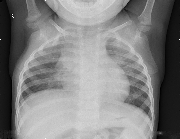

In [22]:
my_image

In [23]:
my_image = image.img_to_array(my_image)

In [24]:
my_image = np.expand_dims(my_image, axis=0)

In [25]:
(classifier.predict(my_image) > 0.9).astype('int32')

array([[1]])

In [26]:
test_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}